参考

[基于波士顿房价数据集的线性回归 Linear Regression on Boston Housing Dataset](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)

In [1]:
import numpy as np  # 多维数组计算， sklearn主要使用的输入和输出数据格式
import matplotlib.pyplot as plt  # 画图用的
import pandas as pd
import seaborn as sns

import sklearn  #  scikit learn的包package名字
from sklearn.datasets import load_boston

In [2]:
# 读取boston房价数据集
ds = load_boston()
ds.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# 506个房子， 13个特征
ds.data.shape

(506, 13)

In [4]:
# 特征
print(list(enumerate(ds.feature_names)))

[(0, 'CRIM'), (1, 'ZN'), (2, 'INDUS'), (3, 'CHAS'), (4, 'NOX'), (5, 'RM'), (6, 'AGE'), (7, 'DIS'), (8, 'RAD'), (9, 'TAX'), (10, 'PTRATIO'), (11, 'B'), (12, 'LSTAT')]


In [5]:
# 房价
ds.target.shape

(506,)

In [6]:
# 数据集说明 包含每一个特征的说明
print(ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

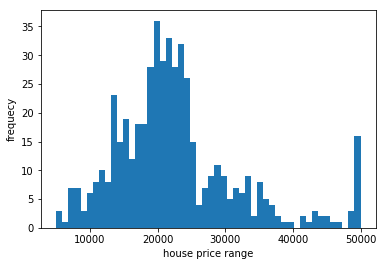

In [7]:
# 房价分布 原始数据以1000刀为单位
plt.hist(ds.target * 1000, 50)
plt.xlabel("house price range")
plt.ylabel("frequecy")
plt.show()

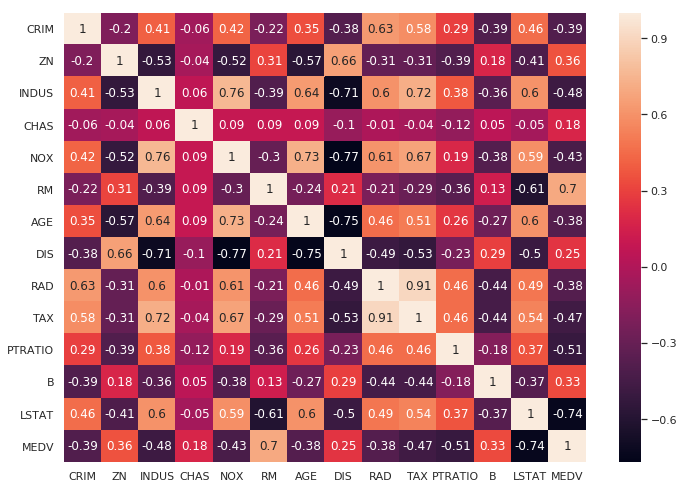

In [8]:
# 特征相关关系
boston = pd.DataFrame(ds.data, columns=ds.feature_names)
boston["MEDV"] = ds.target

sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

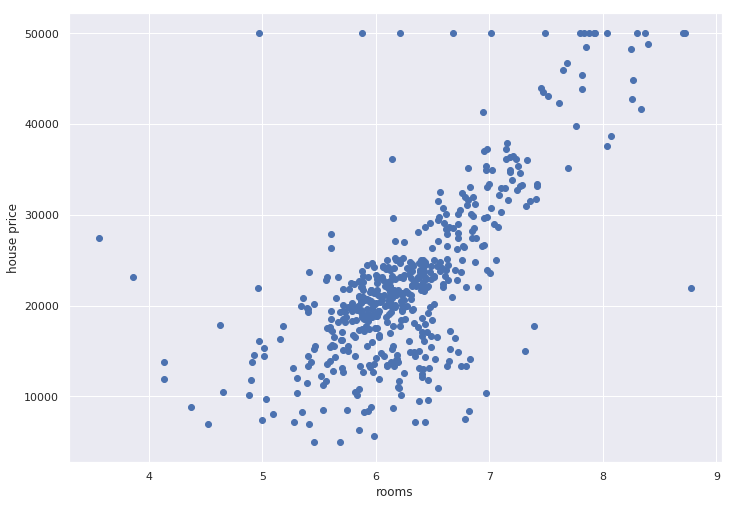

In [9]:
# RM 住宅的房间数 average number of rooms per dwelling
plt.scatter(ds.data[:, 5], ds.target * 1000)
plt.xlabel("rooms")
plt.ylabel("house price")
plt.show()

In [10]:
# sklearn linear regression
# 熟悉sklearn的api
from sklearn.linear_model import LinearRegression

# 初始化模型对象
lr_model = LinearRegression()

# 喂数据
x = ds.data[:, 5:6]
y = ds.target
lr_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# 查看文档
# lr_model??
print(lr_model.__doc__)


    Ordinary least squares Linear Regression.

    Parameters
    ----------
    fit_intercept : boolean, optional, default True
        whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (e.g. data is expected to be already centered).

    normalize : boolean, optional, default False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use
        :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
        an estimator with ``normalize=False``.

    copy_X : boolean, optional, default True
        If True, X will be copied; else, it may be overwritten.

    n_jobs : int or None, optional (default=None)
        The number of jobs to use for the computation. This will only provide
        speedup for

In [12]:
# 模型参数
print("自变量系数, {}".format(lr_model.coef_))
print("常数项系数, {}".format(lr_model.intercept_))

自变量系数, [9.10210898]
常数项系数, -34.67062077643857


In [13]:
# 两点决定一条直线
min_x = x.min()
max_x = x.max()
xl = np.linspace(min_x, max_x, 2)
y_pred = lr_model.predict(xl.reshape((2, 1)))

xl, y_pred

(array([3.561, 8.78 ]), array([-2.25801069, 45.24589608]))

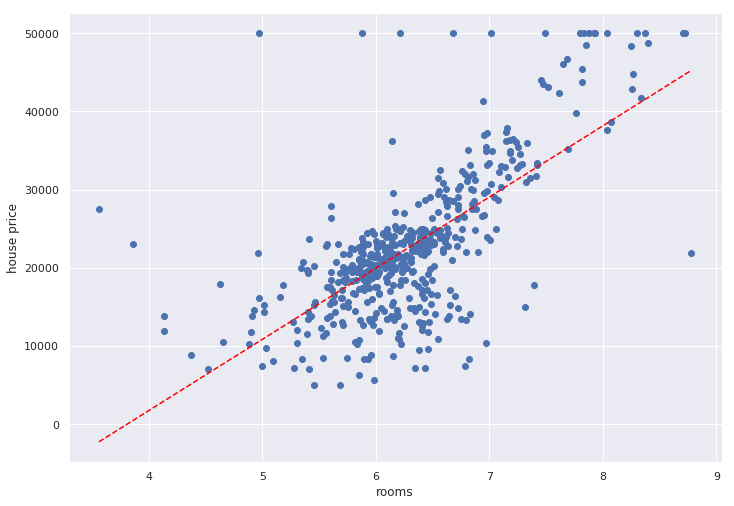

In [14]:
# 画图
plt.scatter(ds.data[:, 5], ds.target * 1000)
plt.xlabel("rooms")
plt.ylabel("house price")
plt.plot(xl, y_pred * 1000, "--", c="red")
plt.show()


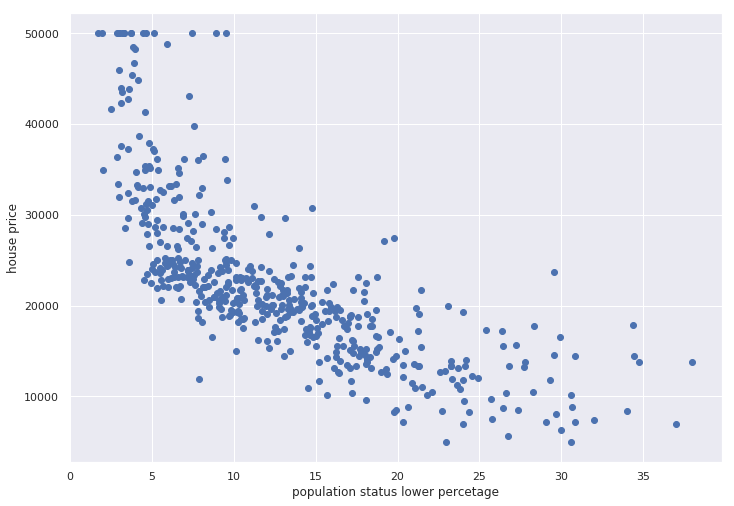

In [15]:
# RM 住宅的房间数 average number of rooms per dwelling
plt.scatter(ds.data[:, 12], ds.target * 1000)
plt.xlabel("population status lower percetage")
plt.ylabel("house price")
plt.show()

In [16]:
# 基于RM和LSTAT 的 K近邻居 
# TODO 模型
# TODO 模型误差比较